# 오버피팅 처리. IMDB 데이터

copy from https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [ ]:
NUM_WORDS = 1000

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
print(raw_train_x[:5])
print(raw_train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

## 멀티-핫 인코딩

[1 3 5] 와 같은 데이터의 경우 1, 3, 5 인덱스만 1이고 나머지는 0으로 인코딩합니다.

```
[1 3 5] -> [0 1 0 1 0 1 0 0 0 0]   # WORD 길이가 10
```

본 예의 경우 NUM_WORDS가 1000이다.

1개의 데이터는 길이 1000의 벡터이며, 포함된 word 인덱스만 1인 값으로 인코딩 된다.

In [ ]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (25000, 1000) 크기의 행렬. 25000은 데이터 갯수, 1000은 NUM_WORDS
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_x = multi_hot_sequences(raw_train_x, dimension=NUM_WORDS)
test_x = multi_hot_sequences(raw_test_x, dimension=NUM_WORDS)
train_y = raw_train_y
test_y = raw_test_y

In [ ]:
print(raw_train_x.shape)
print(raw_train_x[0])
print(train_x.shape)
print(train_x[0][:10])
print(train_x[0][10:20])
print(train_x[0][20:30])


(25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]


모델이 너무 크면 패턴의 '학습'이 아닌 개별 데이터를 '기억'한다.




# 모델 크기별 과적합

### 작은 모델

In [ ]:
small_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

small_model.compile(optimizer='adam', loss='binary_crossentropy')

small_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
small_history = small_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.6414 - val_loss: 0.5517
Epoch 2/20
44/44 - 0s - loss: 0.4776 - val_loss: 0.4257
Epoch 3/20
44/44 - 0s - loss: 0.3889 - val_loss: 0.3760
Epoch 4/20
44/44 - 0s - loss: 0.3477 - val_loss: 0.3536
Epoch 5/20
44/44 - 0s - loss: 0.3270 - val_loss: 0.3441
Epoch 6/20
44/44 - 0s - loss: 0.3149 - val_loss: 0.3386
Epoch 7/20
44/44 - 0s - loss: 0.3061 - val_loss: 0.3362
Epoch 8/20
44/44 - 0s - loss: 0.3002 - val_loss: 0.3372
Epoch 9/20
44/44 - 0s - loss: 0.2969 - val_loss: 0.3385
Epoch 10/20
44/44 - 0s - loss: 0.2916 - val_loss: 0.3387
Epoch 11/20
44/44 - 0s - loss: 0.2884 - val_loss: 0.3409
Epoch 12/20
44/44 - 0s - loss: 0.2861 - val_loss: 0.3417
Epoch 13/20
44/44 - 0s - loss: 0.2824 - val_loss: 0.3427
Epoch 14/20
44/44 - 0s - loss: 0.2814 - val_loss: 0.3465
Epoch 15/20
44/44 - 0s - loss: 0.2786 - val_loss: 0.3563
Epoch 16/20
44/44 - 0s - loss: 0.2764 - val_loss: 0.3512
Epoch 17/20
44/44 - 0s - loss: 0.2739 - val_loss: 0.3522
Epoch 18/20
44/44 - 0s - loss: 0.2737 - 

### 기준 모델

In [ ]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

baseline_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_46 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_x,
                                      train_y,
                                      epochs=20,
                                      batch_size=512,
                                      validation_split=0.1,
                                      verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.5740 - val_loss: 0.4303
Epoch 2/20
44/44 - 0s - loss: 0.3679 - val_loss: 0.3529
Epoch 3/20
44/44 - 0s - loss: 0.3205 - val_loss: 0.3392
Epoch 4/20
44/44 - 0s - loss: 0.3069 - val_loss: 0.3387
Epoch 5/20
44/44 - 0s - loss: 0.2984 - val_loss: 0.3405
Epoch 6/20
44/44 - 0s - loss: 0.2939 - val_loss: 0.3436
Epoch 7/20
44/44 - 0s - loss: 0.2890 - val_loss: 0.3434
Epoch 8/20
44/44 - 0s - loss: 0.2831 - val_loss: 0.3436
Epoch 9/20
44/44 - 0s - loss: 0.2776 - val_loss: 0.3463
Epoch 10/20
44/44 - 0s - loss: 0.2728 - val_loss: 0.3475
Epoch 11/20
44/44 - 0s - loss: 0.2702 - val_loss: 0.3500
Epoch 12/20
44/44 - 0s - loss: 0.2615 - val_loss: 0.3528
Epoch 13/20
44/44 - 0s - loss: 0.2559 - val_loss: 0.3565
Epoch 14/20
44/44 - 0s - loss: 0.2501 - val_loss: 0.3615
Epoch 15/20
44/44 - 0s - loss: 0.2437 - val_loss: 0.3615
Epoch 16/20
44/44 - 0s - loss: 0.2381 - val_loss: 0.3668
Epoch 17/20
44/44 - 0s - loss: 0.2310 - val_loss: 0.3645
Epoch 18/20
44/44 - 0s - loss: 0.2258 - 

### 큰 모델

In [ ]:
big_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

big_model.compile(optimizer='adam', loss='binary_crossentropy')

big_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


역시 같은 데이터를 사용해 모델을 훈련합니다:

In [ ]:
big_history = big_model.fit(train_x,
                                  train_y,
                                  epochs=20,
                                  batch_size=512,
                                  validation_split=0.1,
                                  verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.4308 - val_loss: 0.3383
Epoch 2/20
44/44 - 0s - loss: 0.2933 - val_loss: 0.3558
Epoch 3/20
44/44 - 0s - loss: 0.2331 - val_loss: 0.3522
Epoch 4/20
44/44 - 0s - loss: 0.1264 - val_loss: 0.4118
Epoch 5/20
44/44 - 0s - loss: 0.0329 - val_loss: 0.5255
Epoch 6/20
44/44 - 0s - loss: 0.0068 - val_loss: 0.6298
Epoch 7/20
44/44 - 0s - loss: 0.0017 - val_loss: 0.6833
Epoch 8/20
44/44 - 0s - loss: 8.1064e-04 - val_loss: 0.7204
Epoch 9/20
44/44 - 0s - loss: 5.3614e-04 - val_loss: 0.7491
Epoch 10/20
44/44 - 0s - loss: 3.8376e-04 - val_loss: 0.7762
Epoch 11/20
44/44 - 0s - loss: 2.8577e-04 - val_loss: 0.7976
Epoch 12/20
44/44 - 0s - loss: 2.1922e-04 - val_loss: 0.8176
Epoch 13/20
44/44 - 0s - loss: 1.7192e-04 - val_loss: 0.8366
Epoch 14/20
44/44 - 0s - loss: 1.3779e-04 - val_loss: 0.8545
Epoch 15/20
44/44 - 0s - loss: 1.1212e-04 - val_loss: 0.8713
Epoch 16/20
44/44 - 0s - loss: 9.2847e-05 - val_loss: 0.8871
Epoch 17/20
44/44 - 0s - loss: 7.7922e-05 - val_loss: 0.9003


## 로스 그래프

small


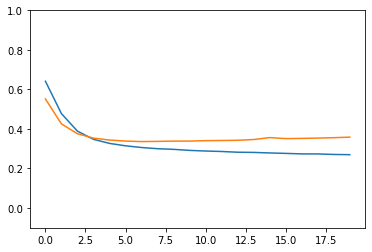

base


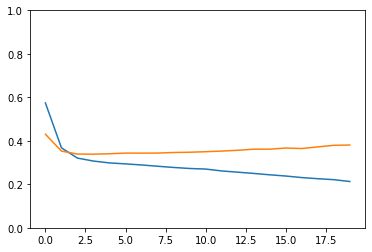

big


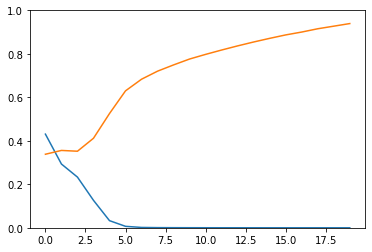

In [ ]:
print("small")
plt.plot(small_history.history['loss'])
plt.plot(small_history.history['val_loss'])
plt.ylim((-0.1, 1.))
plt.show()

print("base")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("big")
plt.plot(big_history.history['loss'])
plt.plot(big_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()


모델이 클수록 오버피팅 발생이 일찍 온다

# 과적합 처리

## weight Regularization

In [ ]:
ㅣ2_baseline_model = keras.Sequential([
    # keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_baseline_model.summary()

l2_baseline_history = ㅣ2_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
44/44 - 1s - loss: 0.6060 - val_loss: 0.4783
Epoch 2/20
44/44 - 0s - loss: 0.4143 - val_loss: 0.4005
Epoch 3/20
44/44 - 0s - loss: 0.3655 - val_loss: 0.3838
Epoch 4/20
44/44 - 0s - loss: 0.3495 - val_loss: 0.3757
Epoch 5/20
44/44 - 0s - loss: 0.3418 - val_loss: 0.3739
Epoch 6/20
44/44 - 0s - loss: 0.3361 - val_loss: 0.3725
Epoch 7/20
44/44 - 0s - loss: 0.3327 - val_

In [ ]:
ㅣ2_big_model = keras.Sequential([
    # keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_big_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_big_model.summary()

l2_big_history = ㅣ2_big_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
44/44 - 1s - loss: 1.2307 - val_loss: 0.8746
Epoch 2/20
44/44 - 0s - loss: 0.7101 - val_loss: 0.6455
Epoch 3/20
44/44 - 0s - loss: 0.5375 - val_loss: 0.5722
Epoch 4/20
44/44 - 0s - loss: 0.4531 - val_loss: 0.5397
Epoch 5/20
44/44 - 0s - loss: 0.3736 - val_loss: 0.5144
Epoch 6/20
44/44 - 0s - loss: 0.3066 - val_loss: 0.5358
Epoch 7/20
44/44 - 0s - loss: 0.2398 - va

baseline


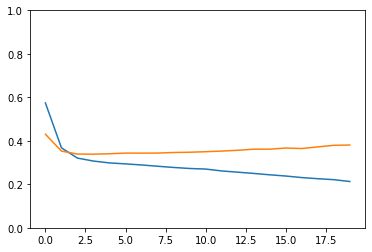

l2_baseline


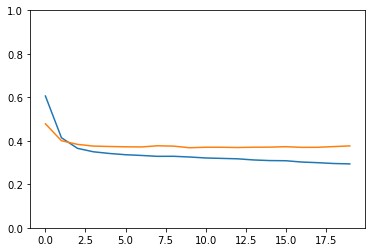

big


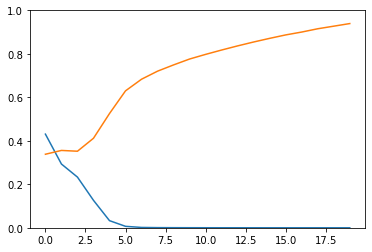

l2_big


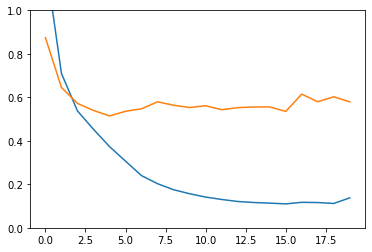

In [ ]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_baseline")
plt.plot(l2_baseline_history.history['loss'])
plt.plot(l2_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("big")
plt.plot(big_history.history['loss'])
plt.plot(big_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_big")
plt.plot(l2_big_history.history['loss'])
plt.plot(l2_big_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

발생하던 오버피팅이 완화되었다.

## Drop Out

In [ ]:
dropout_baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_baseline_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_baseline_history = dropout_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.6768 - accuracy: 0.5622 - binary_crossentropy: 0.6768 - val_loss: 0.6291 - val_accuracy: 0.7448 - val_binary_crossentropy: 0.6291
Epoch 2/20
44/44 - 0s - loss: 0.6007 - accuracy: 0.6713 - binary_crossentropy: 0.6007 - val_loss: 0.5090 - val_accuracy: 0.8196 - val_binary_crossentropy: 0.5090
Epoch 3/20
44/44 - 0s - loss: 0.5209 - accuracy: 0.7427 - binary_crossentropy: 0.5209 - val_loss: 0.4296 - val_accuracy: 0.8408 - val_binary_crossentropy: 0.4296
Epoch 4/20
44/44 - 0s - loss: 0.4612 - accuracy: 0.7902 - binary_crossentropy: 0.4612 - val_loss: 0.3776 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3776
Epoch 5/20
44/44 - 0s - loss: 0.4300 - accuracy: 0.8100 - binary_crossentropy: 0.4300 - val_loss: 0.3537 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3537
Epoch 6/20
44/44 - 0s - loss: 0.4053 - accuracy: 0.8298 - binary_crossentropy: 0.4053 - val_loss: 0.3466 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3466
Epoch 7/20
44/44 - 0s - loss

In [ ]:
dropout_big_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_big_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_big_history = dropout_big_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.4899 - accuracy: 0.7568 - binary_crossentropy: 0.4899 - val_loss: 0.3564 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.3564
Epoch 2/20
44/44 - 0s - loss: 0.3349 - accuracy: 0.8552 - binary_crossentropy: 0.3349 - val_loss: 0.3341 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3341
Epoch 3/20
44/44 - 0s - loss: 0.2956 - accuracy: 0.8749 - binary_crossentropy: 0.2956 - val_loss: 0.3318 - val_accuracy: 0.8664 - val_binary_crossentropy: 0.3318
Epoch 4/20
44/44 - 0s - loss: 0.2582 - accuracy: 0.8937 - binary_crossentropy: 0.2582 - val_loss: 0.3442 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3442
Epoch 5/20
44/44 - 0s - loss: 0.2121 - accuracy: 0.9177 - binary_crossentropy: 0.2121 - val_loss: 0.3588 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3588
Epoch 6/20
44/44 - 0s - loss: 0.1655 - accuracy: 0.9376 - binary_crossentropy: 0.1655 - val_loss: 0.4021 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.4021
Epoch 7/20
44/44 - 0s - loss

baseline


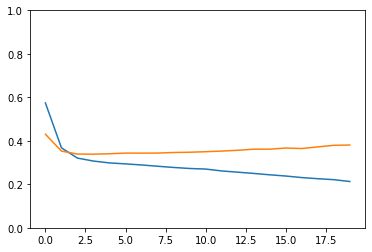

dropout_baseline


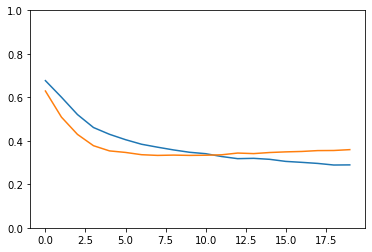

big


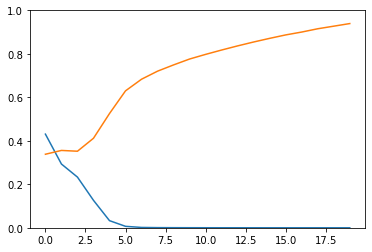

dropout_big


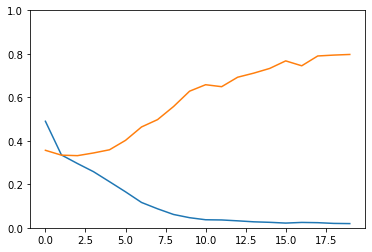

In [ ]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_baseline")
plt.plot(dropout_baseline_history.history['loss'])
plt.plot(dropout_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("big")
plt.plot(big_history.history['loss'])
plt.plot(big_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_big")
plt.plot(dropout_big_history.history['loss'])
plt.plot(dropout_big_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()